# 1) Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load the Dataset

In [3]:
df = pd.read_csv("C:/Users/deepa/Downloads/archive (8)/retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# 3) Understand the Data

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   Total_Spend       1000 non-null   int64 
 10  Total_Amount      1000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 86.1+ KB
None


In [50]:
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount  \
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000   
mean       500.500000    41.39200     2.514000      179.890000    456.000000   
std        288.819436    13.68143     1.132734      189.681356    559.997632   
min          1.000000    18.00000     1.000000       25.000000     25.000000   
25%        250.750000    29.00000     1.000000       30.000000     60.000000   
50%        500.500000    42.00000     3.000000       50.000000    135.000000   
75%        750.250000    53.00000     4.000000      300.000000    900.000000   
max       1000.000000    64.00000     4.000000      500.000000   2000.000000   

       Total_Spend  Total_Amount  
count  1000.000000   1000.000000  
mean    456.000000    456.000000  
std     559.997632    559.997632  
min      25.000000     25.000000  
25%      60.000000     60.000000  
50%     135.000000    135.000000  
75%     900.000000    900.000000  

In [12]:
# Check the column names
import pandas as pd
df = pd.read_csv('C:/Users/deepa/Downloads/archive (8)/retail_sales_dataset.csv')
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


# 4) Handle Missing Values

In [7]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())
df = df.dropna()  

Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


# 5) Calculate average

In [23]:
average_spending = df.groupby('Customer ID')['Total_Spend'].mean()
print("Average Spending per Customer:\n", average_spending)

Average Spending per Customer:
 Customer ID
CUST001     150.0
CUST002    1000.0
CUST003      30.0
CUST004     500.0
CUST005     100.0
            ...  
CUST995      30.0
CUST996      50.0
CUST997      90.0
CUST998     100.0
CUST999     150.0
Name: Total_Spend, Length: 1000, dtype: float64


# 6) Calculate stastics (mean, median, mode, and standard deviation )

In [46]:
df['Total_Amount'] = df['Quantity'] * df['Price per Unit']

# Calculate mean, median, mode, and standard deviation for the Total_Amount column
mean_total_amount = df['Total_Amount'].mean()
median_total_amount = df['Total_Amount'].median()
mode_total_amount = df['Total_Amount'].mode().iloc[0] 
std_total_amount = df['Total_Amount'].std()

# Print the results
print("Mean of Total Amount:", mean_total_amount)
print("Median of Total Amount:", median_total_amount)
print("Mode of Total Amount:", mode_total_amount)
print("Standard Deviation of Total Amount:", std_total_amount)

Mean of Total Amount: 456.0
Median of Total Amount: 135.0
Mode of Total Amount: 50
Standard Deviation of Total Amount: 559.997631555123


# 7) Plot Histogram

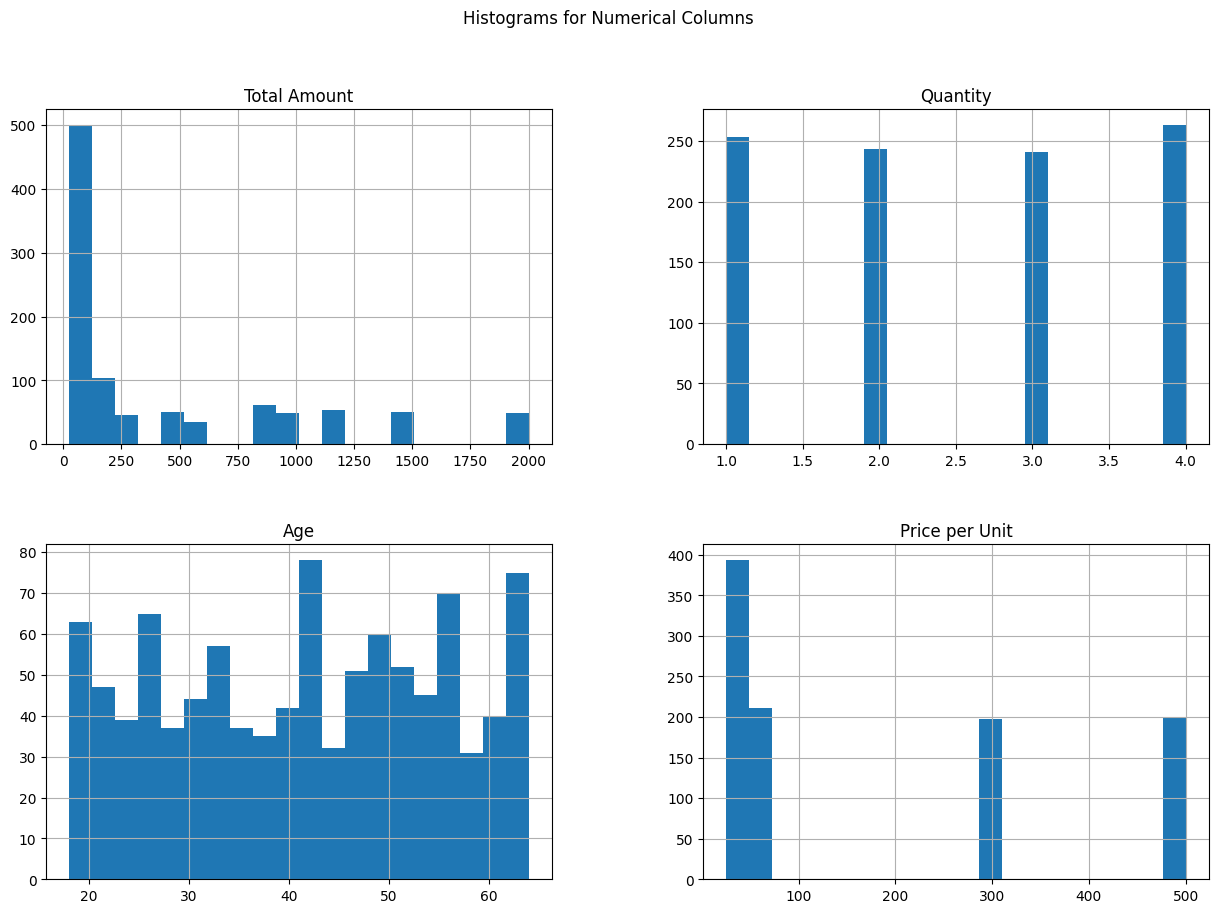

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('C:/Users/deepa/Downloads/archive (8)/retail_sales_dataset.csv')
columns_to_plot = ['Total Amount', 'Quantity','Age', 'Price per Unit'] 

# Plot histograms for the specified columns
df[columns_to_plot].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

In [48]:
# Calculate average spending per customer
average_spending = df.groupby('Customer ID')['Age'].mean()


In [50]:
# Get the top 10 customers by average spending
top_20_customers = average_spending.nlargest(20)


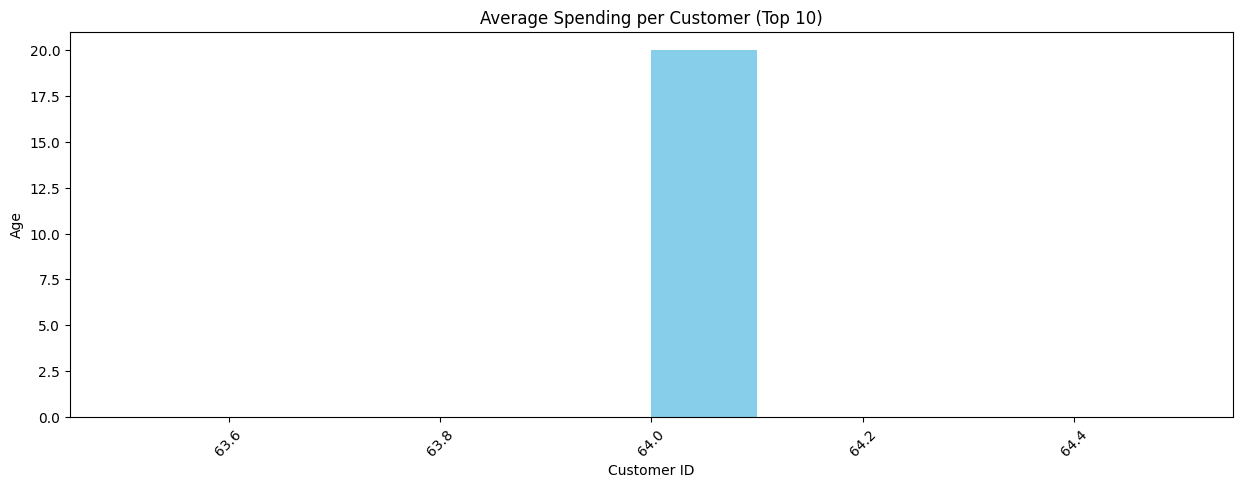

In [56]:
import matplotlib.pyplot as plt

# Plot the bar chart for the top 10 customers
top_20_customers.plot(kind='hist', figsize=(15, 5), color='skyblue')
plt.title('Average Spending per Customer (Top 10)')
plt.xlabel('Customer ID')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


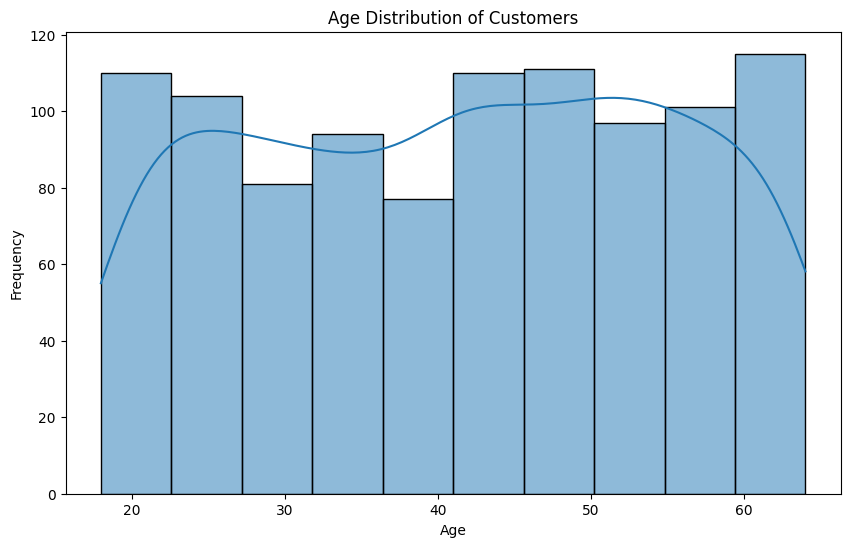

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

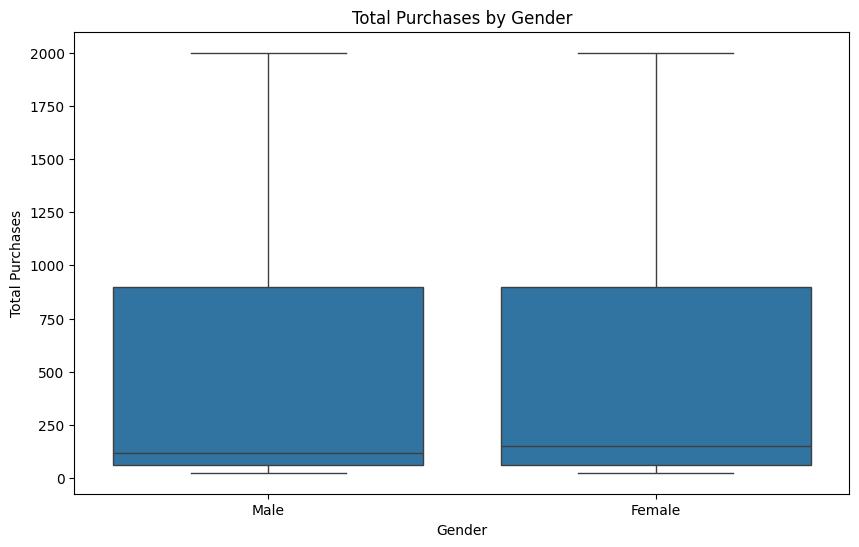

In [62]:
#Analyze Purchases by Gender
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total Amount', data=df)
plt.title('Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchases')
plt.show()

# Calculate average spending per customer

In [130]:
customer_spending = df.groupby('Customer ID')['Total Amount'].mean()

high_value_threshold = customer_spending.quantile(0.8)
high_value_customers = customer_spending[customer_spending >= high_value_threshold]

print("High-value customers identified:", high_value_customers)


High-value customers identified: Customer ID
CUST002    1000.0
CUST013    1500.0
CUST015    2000.0
CUST016    1500.0
CUST026    1000.0
            ...  
CUST966    1000.0
CUST970    2000.0
CUST986    1000.0
CUST990    1000.0
CUST994    1000.0
Name: Total Amount, Length: 202, dtype: float64


In [74]:
# Example insights based on the analysis
average_purchases_by_gender = df.groupby('Gender')['Total Amount'].mean()
print("Average Total Purchases by Gender:\n", average_purchases_by_gender)

Average Total Purchases by Gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


# Top selling product

In [126]:
# Identify top-selling products
top_selling_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Identify underperforming products (bottom 20%)
underperforming_threshold = df.groupby('Product Category')['Total Amount'].sum().quantile(0.2)
underperforming_products = df.groupby('Product Category')['Total_Amount'].sum()
underperforming_products = underperforming_products[underperforming_products <= underperforming_threshold]

print("Top-selling products:\n", top_selling_products)
print("Underperforming products:\n", underperforming_products)


Top-selling products:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64
Underperforming products:
 Product Category
Beauty    143515
Name: Total_Amount, dtype: int64


# Data Visualization

## Bar Plot

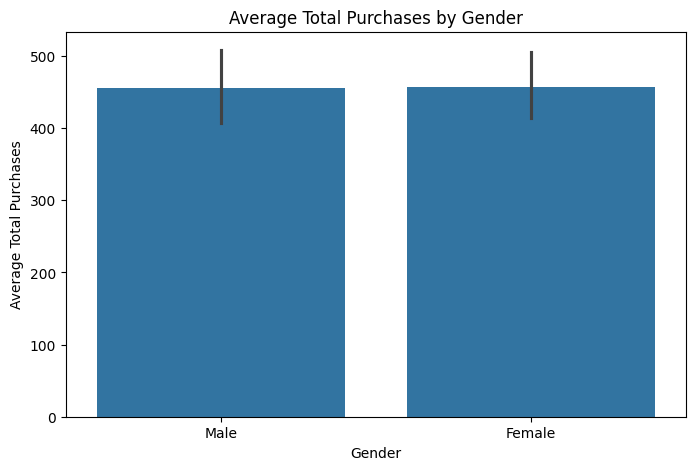

In [86]:
# Bar chart for Average Total Purchases by Gender
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Pass your existing DataFrame to sns.barplot
sns.barplot(x='Gender', y='Total Amount', data=df)

plt.title('Average Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Purchases')
plt.show()

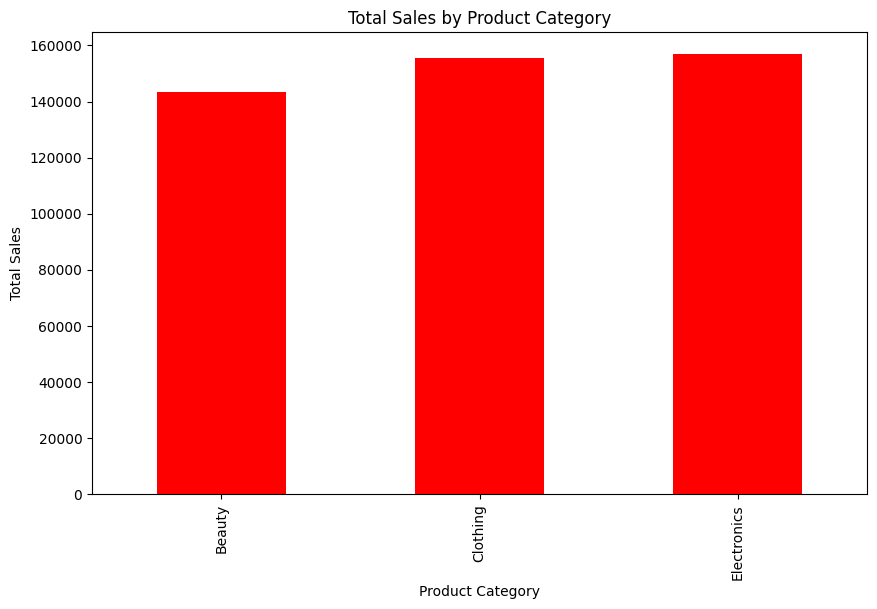

In [152]:
# Group data by Product Category and sum the sales
sales_by_category = df.groupby('Product Category')['Total_Amount'].sum()

# Plot the bar chart
sales_by_category.plot(kind='bar',color='Red', figsize=(10, 6))
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


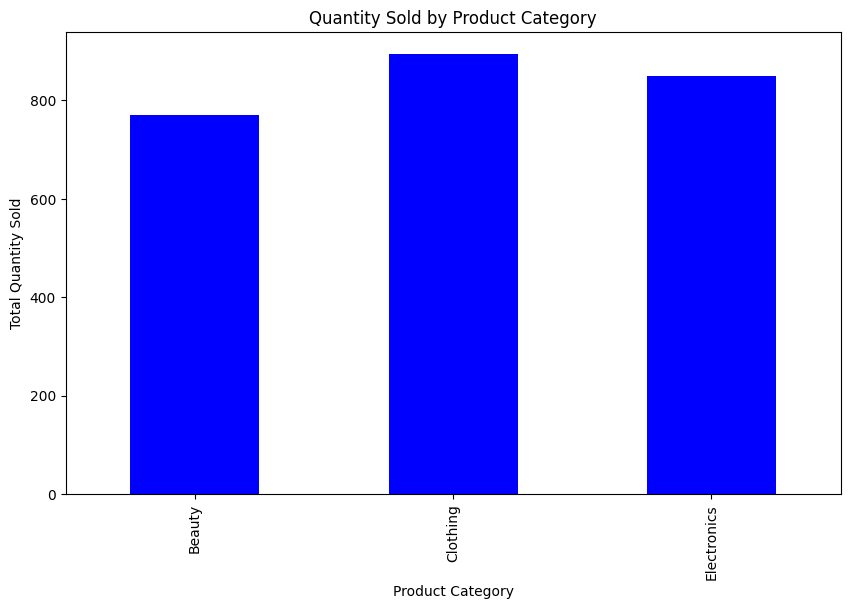

In [154]:
# Group data by Product Category and sum the quantity
quantity_by_category = df.groupby('Product Category')['Quantity'].sum()

# Plot the bar chart
quantity_by_category.plot(kind='bar', color='Blue', figsize=(10, 6))
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()


## Line Plot

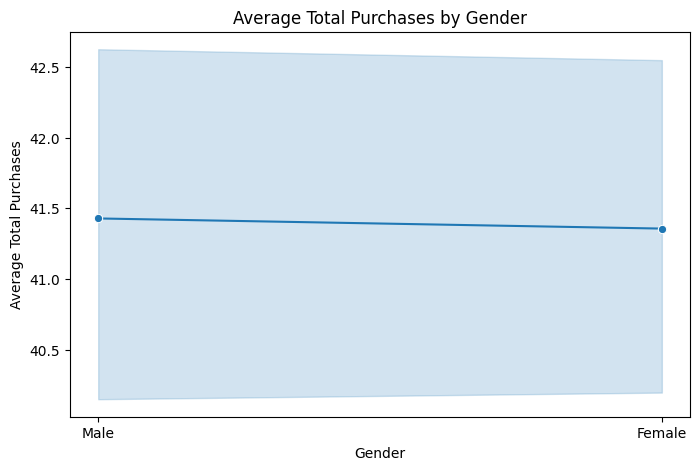

In [100]:
# Line plot for Average Total Purchases by Gender
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your existing DataFrame that contains 'Gender' and 'Total Amount' columns
plt.figure(figsize=(8, 5))

# Pass your existing DataFrame to sns.lineplot
sns.lineplot(x='Gender', y='Age', data=df, marker='o')  # Changed '0' to 'o' for a valid marker style

plt.title('Average Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Purchases')
plt.show()

# Correlation Analysis

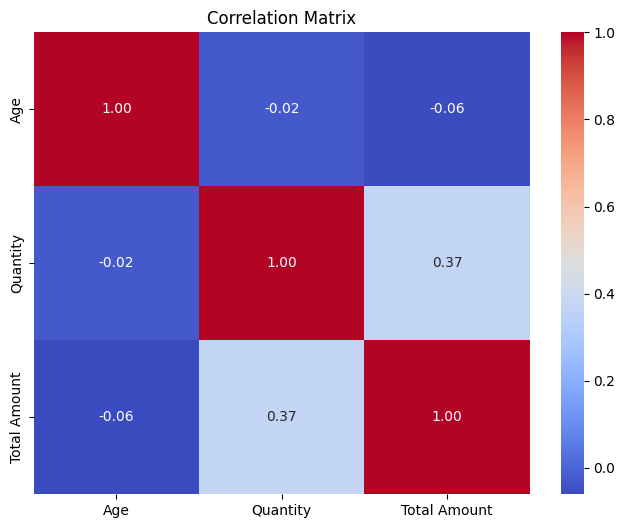

In [70]:
correlation = df[['Age', 'Quantity', 'Total Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Turnover

In [108]:
# Inventory turnover rate by product
inventory_turnover = df.groupby('Product Category')['Quantity'].sum()

low_turnover_threshold = inventory_turnover.quantile(0.2)
low_turnover_products = inventory_turnover[inventory_turnover <= low_turnover_threshold]

print("Low turnover products:\n", low_turnover_products)


Low turnover products:
 Product Category
Beauty    771
Name: Quantity, dtype: int64


# Price Analysis

Correlation between Price per unit and Sales: 0.8519248403554031


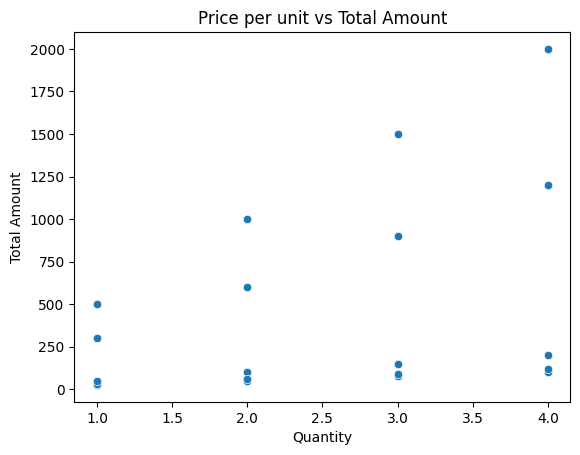

In [72]:
# Analyze price sensitivity by looking at sales vs. price
price_sales_corr = df[['Price per Unit', 'Total Amount']].corr().iloc[0, 1]
print("Correlation between Price per unit and Sales:", price_sales_corr)

# Visualize the relationship between Price and Total_Amount
sns.scatterplot(x='Quantity', y='Total Amount', data=df)
plt.title("Price per unit vs Total Amount")
plt.show()
